In [1]:
import os
from pyprojroot.here import here

os.environ["KERAS_BACKEND"] = "torch"
os.environ["KERAS_HOME"] = str(here("cache"))

import keras_hub
import keras
os.environ['KAGGLEHUB_CACHE'] = str(here("data"))

import kagglehub

# Download latest version
path = kagglehub.model_download("keras/efficientnet/keras/efficientnet_lite0_ra_imagenet")

print("Path to model files:", path)


100%|██████████| 2.44k/2.44k [00:00<00:00, 2.50MB/s]


100%|██████████| 5.95k/5.95k [00:00<00:00, 6.10MB/s]


100%|██████████| 1.75k/1.75k [00:00<00:00, 250kB/s]



100%|██████████| 903/903 [00:00<00:00, 903kB/s]




100%|██████████| 188/188 [00:00<?, ?B/s] 








100%|██████████| 13.4M/13.4M [00:01<00:00, 8.76MB/s]





100%|██████████| 18.3M/18.3M [00:02<00:00, 8.42MB/s]

Path to model files: c:\Users\Plancha\AML-homework\data\models\keras\efficientnet\keras\efficientnet_lite0_ra_imagenet\2


In [3]:
# load model with keras using path
model = keras.saving.load_model(path)
model.summary()

Model: "efficient_net_backbone"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv_pad  │ (None, None,      │          0 │ stem_activation[… │
│ (ZeroPadding2D)     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ block1a_dwconv_p… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv_bn   │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv_act… │ (None, None,      │          0 │ block1a_dwconv_b… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project     │ (None, None,      │        512 │ block1a_dwconv_a… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project[… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      1,536 │ block1a_project_… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_dwconv_pad  │ (None, None,      │          0 │ block2a_expand_a… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_dwconv      │ (None, None,      │        864 │ block2a_dwconv_p… │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_dwconv_bn   │ (None, None,      │        384 │ block2a_dwconv[0

 Total params: 3,413,024 (13.02 MB)

 Trainable params: 3,371,008 (12.86 MB)

 Non-trainable params: 42,016 (164.12 KB)

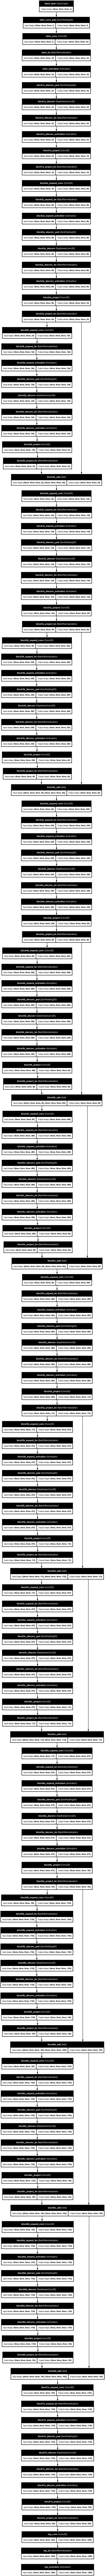

In [4]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
import visualkeras

visualkeras.graph_view(model)

In [5]:
# save model
model.save(here("models/efficientnet_lite.keras"))